In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
df = pd.read_csv('dataset_anxiety.csv')
df

,Tanpa Nama: 0,penyataan,status
0,31645,"Saya pikir, itu hanya akan memakan waktu satu...",Normal
1,31843,Tolong?,Normal
2,1739,"Aduu lebaran kali ini gak bisa kumpul lagi, t...",Normal
3,43846,sayang aku sangat merindukanmu,Normal
4,4961,15 menit jika Anda tidak tidur. Jika Anda tid...,Normal
...,...,...,...
7771,53038,Tidak ada yang menganggapku serius. Aku (24M) ...,Kecemasan
7772,53039,"keegoisan ""Saya merasa tidak enak badan, rasan...",Kecemasan
7773,53040,Apakah ada cara untuk tidur lebih baik? Saya t...,Kecemasan
7774,53041,"Tips berbicara di depan umum? Hai, semuanya. ...",Kecemasan


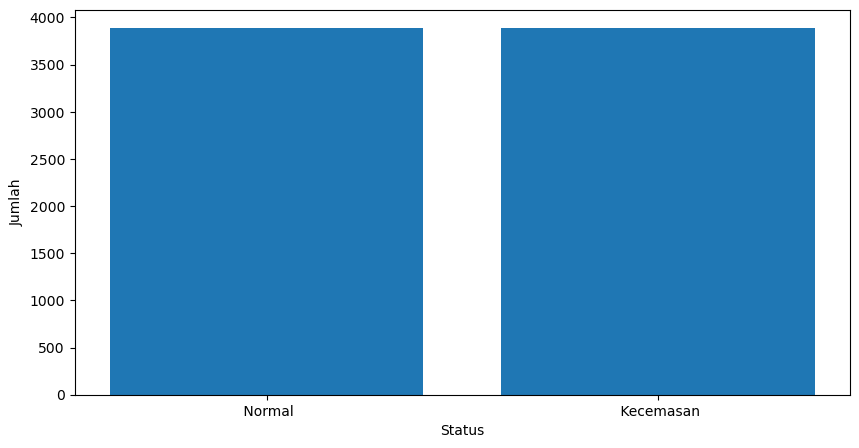

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df['status'].value_counts().index, df['status'].value_counts())
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()  

In [32]:
df.isna().sum()

Tanpa Nama: 0     0
penyataan        47
status            0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df['status'].value_counts()

status
Normal       3888
Kecemasan    3841
Name: count, dtype: int64

In [ ]:
# Preprocessing
df['penyataan'] = df['penyataan'].str.lower()  # Lowercase text
df['penyataan'] = df['penyataan'].fillna('')  # Handle missing values

In [47]:
# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Limit to the top 10000 words
tokenizer.fit_on_texts(df['penyataan'])

In [48]:
# Convert text to sequences of integers
X = tokenizer.texts_to_sequences(df['penyataan'])

In [51]:
# Pad sequences to make sure they are of the same length
max_length = 100  # You can adjust this based on your dataset
X = pad_sequences(X, maxlen=max_length)

In [3]:
emo = pd.read_csv('emo-scoring.csv')
emo.head(5)

,statement,status,cleaned,empath_label,empath_scores,label_encoded
0,i think it will only take you a year or two.,Normal,think take year two,anxiety,"{'anxiety': 0.0, 'fear': 0.0, 'nervousness': 0...",0
1,please?,Normal,please,anxiety,"{'anxiety': 0.0, 'fear': 0.0, 'nervousness': 0...",0
2,"Aduu this Lebaran can't get together again, th...",Normal,aduu lebaran cant get together year also dont ...,fear,"{'anxiety': 0.0, 'fear': 0.0625, 'nervousness'...",2
3,baby i miss you so much,Normal,baby miss much,anxiety,"{'anxiety': 0.0, 'fear': 0.0, 'nervousness': 0...",0
4,15 minutes long if you don't sleep. If you sle...,Normal,minutes long dont sleep sleep,anxiety,"{'anxiety': 0.0, 'fear': 0.0, 'nervousness': 0...",0
